In [1]:
import pandas as pd , numpy as np
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
for root,direc,filename in os.walk(os.path.join(os.getcwd(),'Downloads')):
    if direc =='project 1 mercedes benz':
        print(os.path.join(root,direc,train.csv))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
train = pd.read_csv(os.path.join(os.getcwd(),'Downloads','project 1 mercedes benz','train.csv'))
test = pd.read_csv(os.path.join(os.getcwd(),'Downloads','project 1 mercedes benz','test.csv'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)
print(test.shape)

(4209, 378)
(4209, 377)


In [6]:
train.isna().sum().sum()

0

In [7]:
train.isna().any()[lambda x:x]

Series([], dtype: bool)

In [8]:
duplicate = train[train.duplicated(keep = 'last')]
print(duplicate)

Empty DataFrame
Columns: [ID, y, X0, X1, X2, X3, X4, X5, X6, X8, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, ...]
Index: []

[0 rows x 378 columns]


In [9]:
varzero = []
for column in train.columns:
    if train[column].dtype != 'O':
        if train[column].var() == 0:
            varzero.append(column)

In [10]:
varzero

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [11]:
train.drop(columns= varzero,inplace = True)

In [12]:
test = test.drop(columns = varzero)

In [13]:
print(train.shape)
print(test.shape)

(4209, 366)
(4209, 365)


In [14]:
train.dtypes.value_counts()

int64      357
object       8
float64      1
dtype: int64

In [15]:
train.isnull().any().any()

False

In [16]:
test.isnull().any()[lambda x:x]

Series([], dtype: bool)

In [17]:
train.nunique().sort_values(ascending = False)

ID      4209
y       2545
X0        47
X2        44
X5        29
        ... 
X131       2
X130       2
X129       2
X128       2
X385       2
Length: 366, dtype: int64

In [18]:
# num_cols = [i for i in df.columns if df[i].dtype!= 'O']
cols = train.columns
num_cols = train._get_numeric_data().columns

In [19]:
# cat_cols = [i for i in df.columns if i not in num_cols]
cat_cols = list(set(cols) - set(num_cols))

In [20]:
cat_cols

['X0', 'X6', 'X3', 'X4', 'X1', 'X8', 'X5', 'X2']

In [21]:
for i in test.columns:
    if test[i].dtypes=='int64' or  test[i].dtypes=='float64':
        q1 = test[i].quantile(0.25)
        q3 = test[i].quantile(0.75)
        iqr = q3-q1
        low = q1-(1.5*iqr)
        hi = q3+(1.5*iqr)
        test[i] = np.where((test[i]<low)|(test[i]>hi),train[i].median(),test[i])

In [22]:
for i in train.columns:
    if i!='ID' or i!='y':
        if train[i].dtypes=='int64' or  train[i].dtypes=='float64':
            q1 = train[i].quantile(0.25)
            q3 = train[i].quantile(0.75)
            iqr = q3-q1
            low = q1-(1.5*iqr)
            hi = q3+(1.5*iqr)
            train[i] = np.where((train[i]<low)|(train[i]>hi),train[i].median(),train[i])

In [23]:
print(test.shape)
print(train.shape)

(4209, 365)
(4209, 366)


In [24]:
train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)

In [25]:
from sklearn.preprocessing import LabelEncoder
for  i in cat_cols:
    zx = list(train[i].unique())+list(test[i].unique())
    le = LabelEncoder()
    le.fit(zx)
    train[i] = le.transform(train[i])
    test[i] = le.transform(test[i])

In [26]:
x_train = train.drop(columns = ['ID','y'])
y  = train[['y']]

In [27]:
x_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37,21,22,4,3,31,11,14,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,24,38,2,3,30,9,23,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24,21,38,5,3,30,11,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,23,38,5,3,14,3,13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,10,20,19,2,3,1,3,16,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4205,36,16,44,3,3,1,7,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4206,10,23,42,0,3,1,6,4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4207,11,19,29,5,3,1,11,20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.decomposition import PCA

In [29]:
pc = PCA(n_components = 10)
pc.fit(x_train)

PCA(n_components=10)

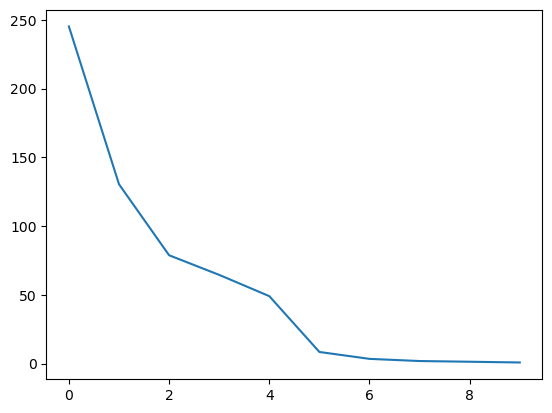

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pc.explained_variance_)

In [31]:
x_pca = pc.transform(x_train)

In [32]:
x_pca.shape

(4209, 10)

<BarContainer object of 10 artists>

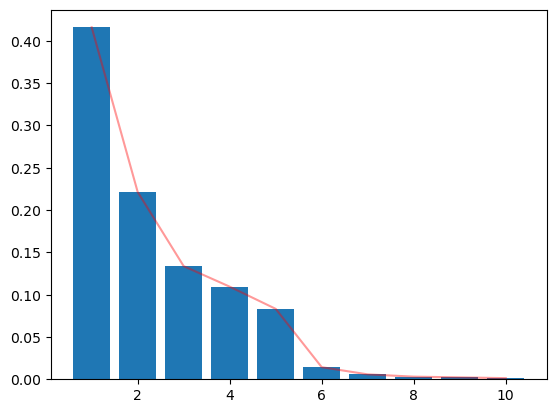

In [33]:
plt.plot(range(1,11),pc.explained_variance_ratio_,color = 'r',alpha= 0.4)
plt.bar(range(1,11),pc.explained_variance_ratio_)

In [34]:
pca = PCA(n_components =6)
pca.fit(x_train)
x_pca = pca.transform(x_train)
x_pca.shape


(4209, 6)

In [35]:
test_ID = test['ID']

In [36]:
test_pca = pca.transform(test.drop(['ID'],axis=1))

In [37]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x_pca,y,test_size = 0.25,random_state = 123)

In [38]:
import xgboost as xgb_
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score , mean_squared_error as mse

## basic XGB regressor

In [56]:
xgbbasic = xgb_.XGBRegressor(objective ='reg:linear', random_state  = 123)
xgbbasic.fit(x_train,y_train)

[12:16:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [57]:
print(r2_score(y_train,xgbbasic.predict(x_train)))
print(r2_score(y_test,xgbbasic.predict(x_test)))

0.8964805327873763
0.39481771868545823


In [58]:
print(mse(y_train,xgbbasic.predict(x_train)))
print(mse(y_test,xgbbasic.predict(x_test)))

13.265168266067267
80.09716221115828


# xgb regressor using DMatrix

In [61]:
matrix = xgb_.DMatrix(x_pca,label = y)
params = {'objective':'reg:linear'}
modelcv = xgb_.cv(dtrain =matrix , params = params , nfold = 3 ,num_boost_round = 50,early_stopping_rounds = 10,metrics = 'rmse',as_pandas = True,seed = 7)

[12:17:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [62]:
modelcv.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
20,6.669510,0.097852,8.565662,0.211388
21,6.593094,0.136217,8.578226,0.212417
22,6.540634,0.138946,8.572695,0.207196
23,6.479749,0.104328,8.564559,0.216491
24,6.408362,0.136584,8.562477,0.214235


# using random search cv

In [92]:
params = {
    'objective':['reg:squarederror'],
    'max_depth' : [3,8,13,19],
    'booster':['gbtree','gblinear'],
    'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7],
    'eval_metric': ['rmse']
}

In [93]:
xgb = xgb_.XGBRegressor(nthread = -1,random_state=30)
random_search = RandomizedSearchCV(xgb,param_distributions = params,n_iter=100,cv = 5,scoring = 'neg_mean_squared_error',n_jobs = -1 )

In [94]:
import time
start = time.time()
random_search.fit(x_train,y_train)
print(f'took {(time.time()-start)}  seconds for completion .')

took 68.20517253875732  seconds for completion .


In [95]:
final_model = random_search.best_estimator_

In [96]:
final_model = final_model.fit(x_train,y_train)

In [97]:
y_pred = final_model.predict(x_test)

In [98]:
print('rmse for train set is  :  ',mse(y_train,final_model.predict(x_train),squared=False))
print('rmse for validation set is  :  ',mse(y_test,y_pred,squared=False))

rmse for train set is  :   6.005712603105041
rmse for validation set is  :   8.481882535225662


In [99]:
print('r2_score for train  set is  :   ',r2_score(y_train,final_model.predict(x_train)))
print('r2_score for validation  set is  :   ',r2_score(y_test,final_model.predict(x_test)))

r2_score for train  set is  :    0.7185259537942881
r2_score for validation  set is  :    0.45643237535087966


 # prediction the test set for submission using best estimator from RandomSearcCV

In [51]:
test_pred = final_model.predict(test_pca)

In [52]:
submission = pd.DataFrame()
submission['predictions'] = test_pred.tolist()
submission['ID'] = test_ID

In [53]:
submission = submission.loc[:,['ID','predictions']]

In [54]:
submission

,ID,predictions
0,1.0,79.733963
1,2.0,95.458893
2,3.0,90.824066
3,4.0,79.345421
4,5.0,102.808243
...,...,...
4204,8410.0,106.894798
4205,8411.0,93.920967
4206,8413.0,99.669518
4207,8414.0,107.443001
